In [ ]:
#########################################################################
# Imports
#########################################################################
import os
from ultralytics import YOLO
import hyperparams as hp
from utils import setup_dirs, split_dataset, eda_distribution, eda_samples, eda_average_image, eda_brightness, eval_training_curves, eval_validate_model, eval_visual_predictions, eval_confusion_matrix, eval_metrics_table

In [3]:
#########################################################################
# Preperation
#
#########################################################################
# Don't execute this cell unless you already have the dataset downloaded, and don't mind it being re-organized.

# Setup directories
setup_dirs()
# Split dataset into train and val
split_dataset()

Created: /home/yuri/projects/SpaghettiNet_3D-printer-spaghetti-detection/datasets/classification/final/train/clean
Created: /home/yuri/projects/SpaghettiNet_3D-printer-spaghetti-detection/datasets/classification/final/train/spaghetti
Created: /home/yuri/projects/SpaghettiNet_3D-printer-spaghetti-detection/datasets/classification/final/val/clean
Created: /home/yuri/projects/SpaghettiNet_3D-printer-spaghetti-detection/datasets/classification/final/val/spaghetti
Processing 'clean': 810 Train, 203 Val
Processing 'spaghetti': 192 Train, 49 Val


Generating Class Distribution Plots...


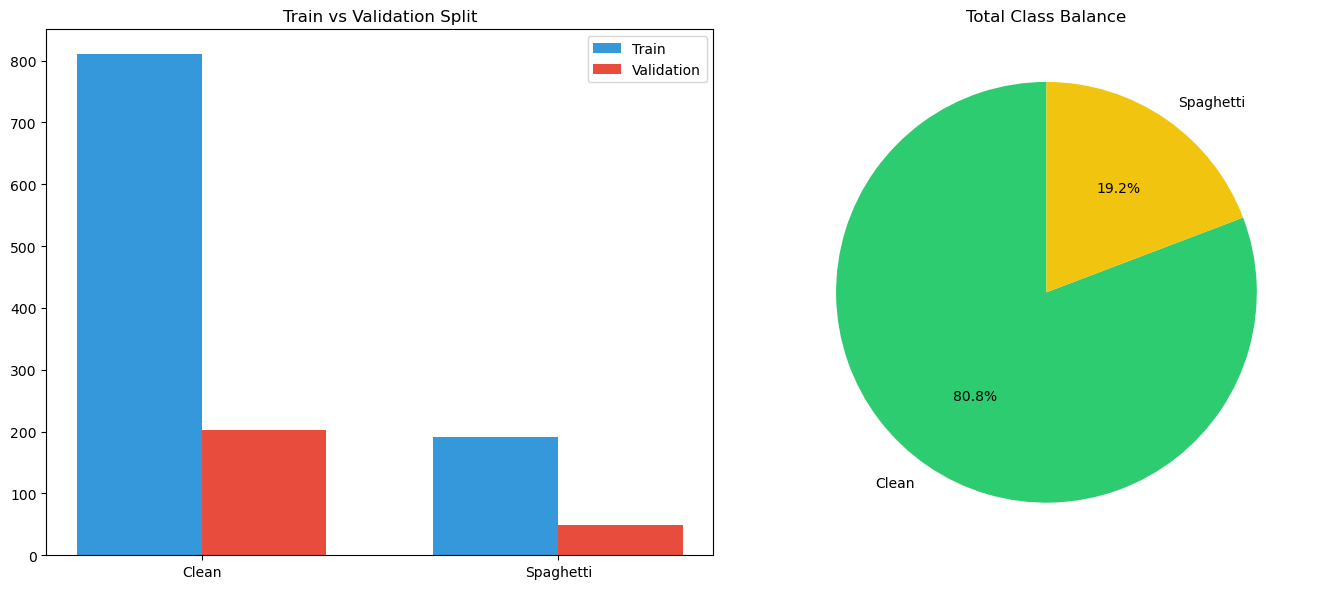

Showing 5 random samples per class from training set...


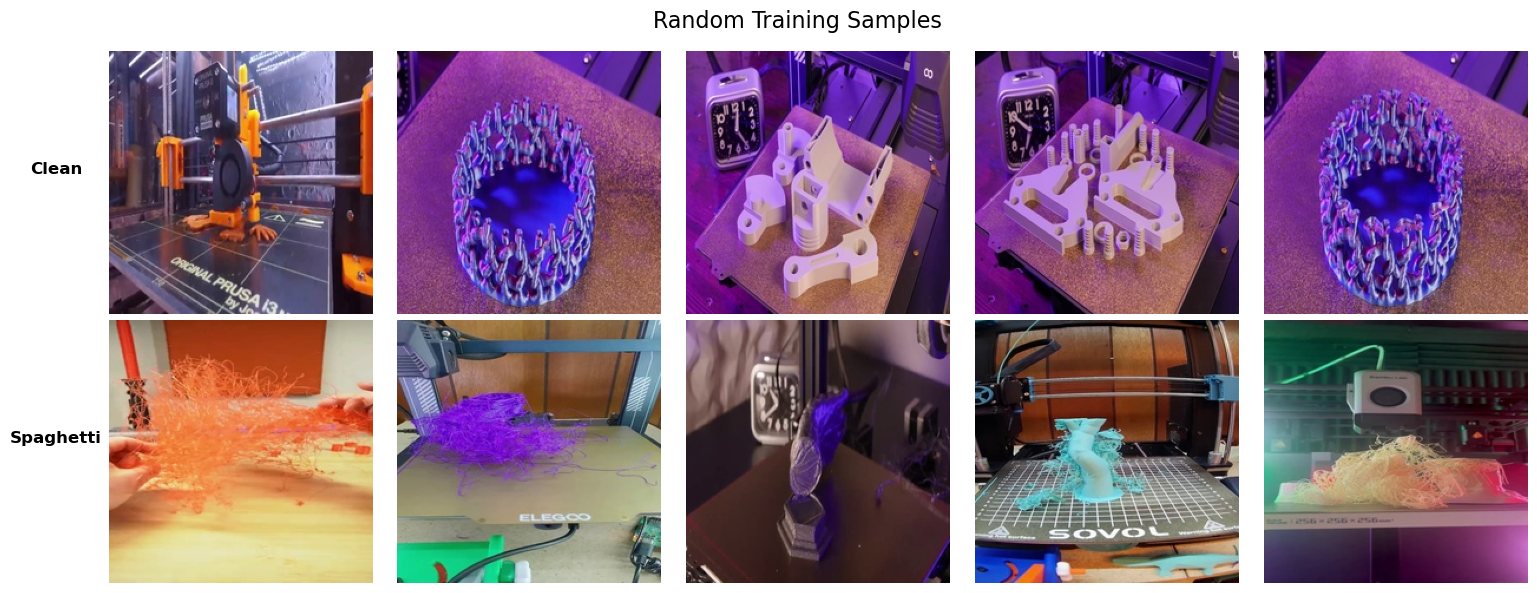

Generating Average (Mean) Image analysis...


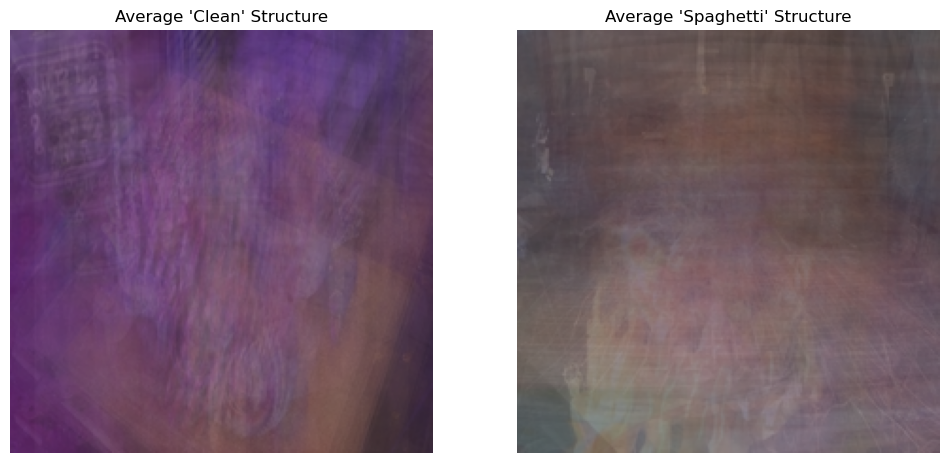

Calculating brightness distribution...


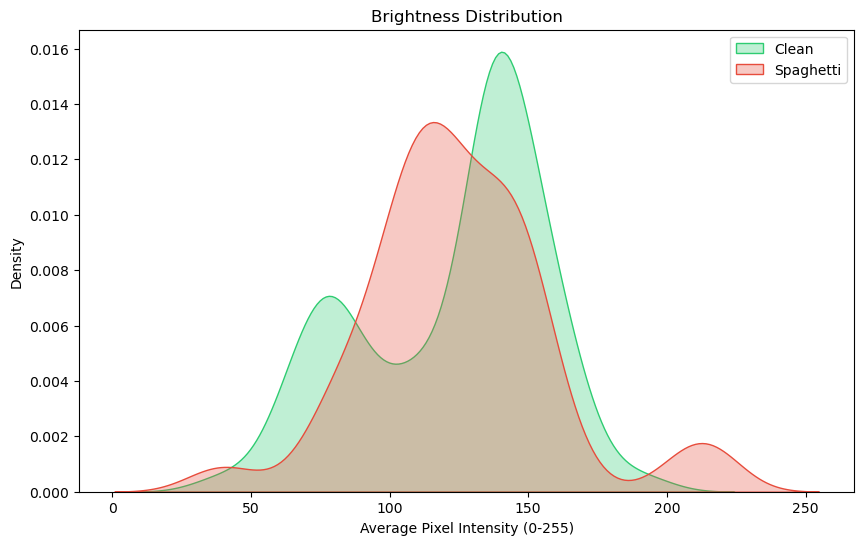

In [4]:
#########################################################################
# Exploratory Data Analysis (EDA)
#########################################################################

# 1. Check for Class Imbalance
# Necessary because if one class (e.g., 'clean') has 90% of the data, 
# the model might cheat by always guessing 'clean' without actually learning anything.
eda_distribution()

# 2. visual Sanity Check
# Necessary to verify that the images were loaded correctly, are not corrupt, 
# and that 'spaghetti' actually looks like print failures before we waste time training.
eda_samples(num_samples=5)

# 3. Analyze Structural Consistency (The "Ghost" Image)
# Necessary to see if 'clean' prints share a common shape (creating a ghost-like average)
# versus 'spaghetti' which should be chaotic. If both look like gray blobs, the model will struggle.
eda_average_image()

# 4. Check for Environmental Bias (Lighting)
# Necessary to ensure the model isn't just learning that "dark images = spaghetti" 
# (e.g., if you only print spaghetti at night). We want it to learn the shape, not the brightness.
eda_brightness()

In [5]:
#########################################################################
#   Yolo26 finetuning training
#########################################################################

print(f"Loading model with weights at: {hp.PATH_WEIGHTS_YOLO}")
model = YOLO(hp.PATH_WEIGHTS_YOLO)
print(f"Model loaded: {model}")
    
results = model.train(
    data=hp.PATH_FINAL_DATASET, 
    epochs=hp.EPOCHS,
    imgsz=hp.IMG_SIZE,
    batch=hp.BATCH_SIZE,
    project=hp.PATH_BASE,
    name=hp.FINAL_WEIGHTS_NAME,
    exist_ok=True               # Overwrite existing results, if any
)
    
print("Training complete.")

Loading model with weights at: /home/yuri/projects/SpaghettiNet_3D-printer-spaghetti-detection/models/classification/yolo26n-cls.pt
Model loaded: YOLO(
  (model): ClassificationModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C3k2(
        (cv1): Conv(
          (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv):

Starting evaluation...
Plotting training results from: /home/yuri/projects/SpaghettiNet_3D-printer-spaghetti-detection/models/classification/Final_Classification_Results/results.csv


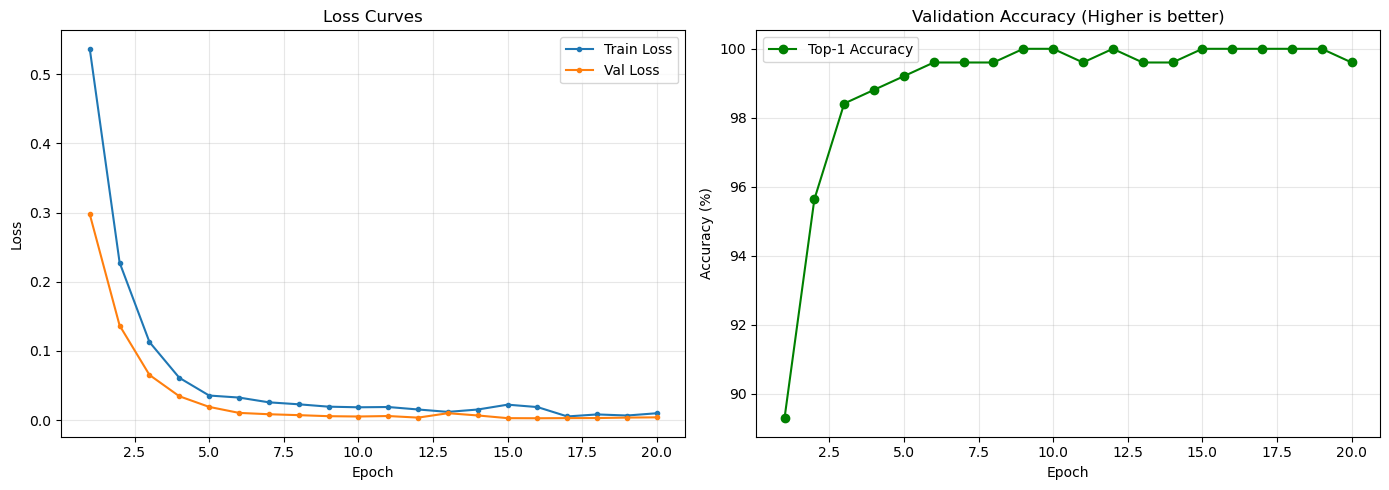

Loading best model from: /home/yuri/projects/SpaghettiNet_3D-printer-spaghetti-detection/models/classification/Final_Classification_Results/weights/best.pt

Starting Validation on Validation Set...
Ultralytics 8.4.3 🚀 Python-3.11.14 torch-2.9.1+rocm6.4 CUDA:0 (AMD Radeon RX 6800 XT, 16368MiB)
YOLO26n-cls summary (fused): 47 layers, 1,528,586 parameters, 0 gradients
train: /home/yuri/projects/SpaghettiNet_3D-printer-spaghetti-detection/datasets/classification/final/train... found 1002 images in 2 classes ✅ 
val: /home/yuri/projects/SpaghettiNet_3D-printer-spaghetti-detection/datasets/classification/final/val... found 252 images in 2 classes ✅ 
test: None...
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 947.9±398.6 MB/s, size: 20.4 KB)
val: Scanning /home/yuri/projects/SpaghettiNet_3D-printer-spaghetti-detection/datasets/classification/final/val... 252 images, 0 corrupt: 100% ━━━━━━━━━━━━ 252/252 151.0Mit/s 0.0s
               classes   top1_acc   top5_acc: 100% ━━━━━━━━━━━━ 16/16 3.

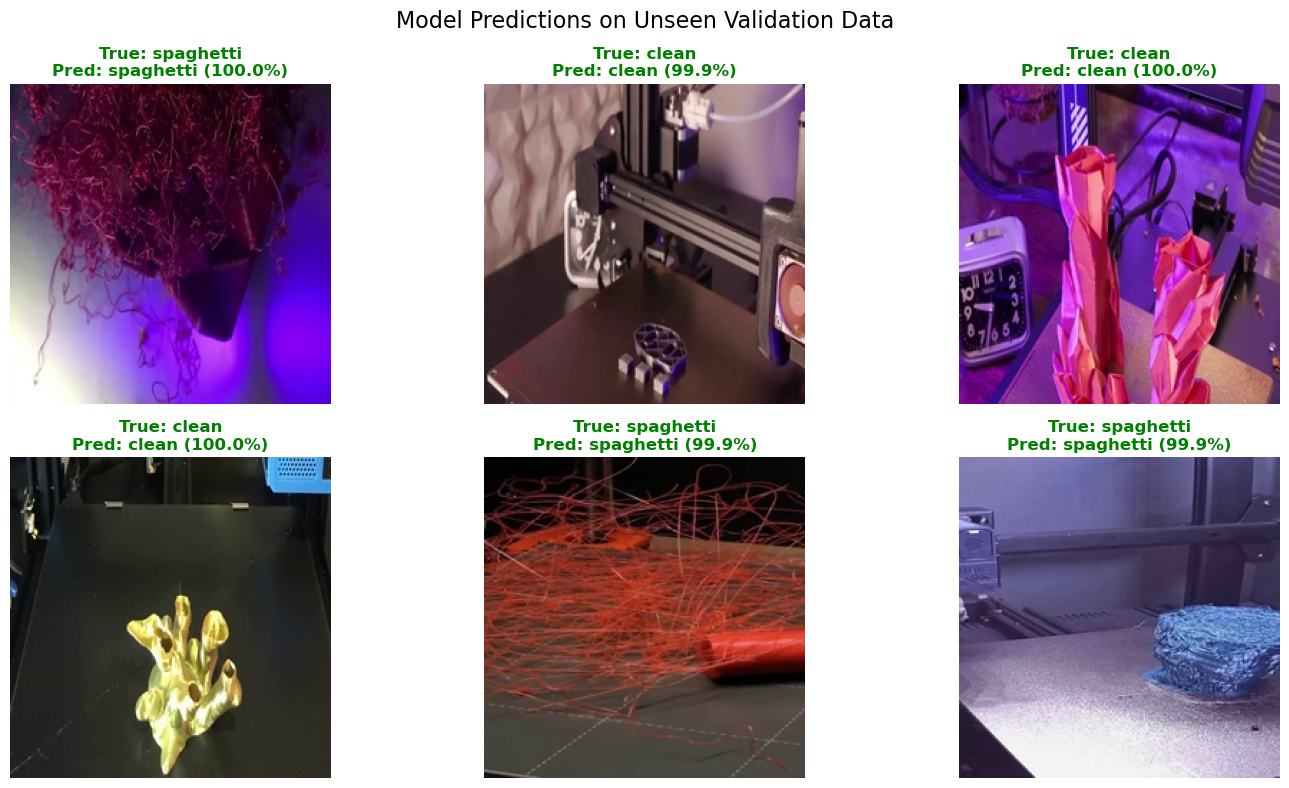

In [ ]:
##########################################################################
#  Evaluation
##########################################################################
print("Starting evaluation...")

# 1. Did we learn? (Training Curves)
eval_training_curves()

# 2. Official Accuracy (Top-1 / Top-5)
eval_validate_model()

# 3. The "Standard Table Thingy" (Precision, Recall, F1)
# This breaks down performance per class.
# Look for: Low Recall on 'spaghetti' (means we missed failures).
eval_metrics_table()

# 4. Confusion Matrix
# Visualizes where the mix-ups happened.
eval_confusion_matrix()

# 5. Visual Proof
eval_visual_predictions(num_samples=6)